In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import *


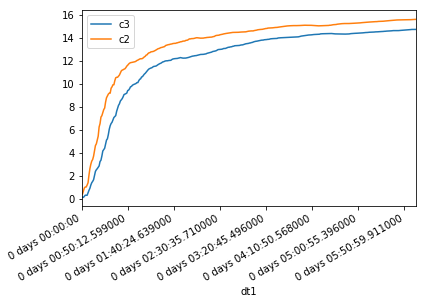

,dt1,controller,drones,queue,deliveries,fullTrips,revenue,costs,penalties,avgDelTime,avgWaitTime,fDel,fRet,fLaunch,total,profit
726,00:00:00,2,0,0,0,0,0,0.000000,0,NaN,NaN,0,0,0,0,0.000000
725,00:00:00.152000,3,0,0,0,0,0,0.000000,0,NaN,NaN,0,0,0,0,0.000000
724,00:00:59.842000,2,5,8,0,0,0,0.000000,0,NaN,0.408305,0,0,0,13,0.000000
723,00:01:00.991000,3,1,0,0,0,0,0.000000,0,NaN,0.129972,0,0,1,2,0.000000
722,00:02:00.990000,3,5,1,0,0,0,0.000000,0,NaN,0.111644,0,0,1,7,0.000000
721,00:02:01.043000,2,10,12,2,0,169,0.000000,0,1.450062,0.654998,0,0,1,23,1.690000
720,00:03:02.330000,2,14,12,3,1,278,1.378583,0,1.878260,0.930630,0,0,2,29,2.766214
719,00:03:03.592000,3,9,4,0,0,0,0.000000,0,NaN,0.208910,0,0,3,16,0.000000
718,00:04:02.323000,2,15,22,3,2,278,3.095423,0,1.878260,1.014797,0,0,2,41,2.749046
717,00:04:06.887000,3,13,1,1,0,109,0.000000,0,2.776143,0.299673,0,0,5,19,1.090000


In [6]:
inputfile = "02jun_2242.txt"
yaxis = 'avgWaitTime'

df = pd.read_table(inputfile, " ")

df['dt1'] = df['dt1'] + " " + df['dt2'] + " " + df['dt3'] + " " + df['dt4']
df = df.drop(['dt2', 'dt3', 'dt4', 'collisions', 'unknown'], axis=1)
df['dt1'] = df['dt1'].apply(lambda x: pd.to_datetime(parse(x)))
minval = df['dt1'].min()
df['dt1'] = df['dt1'].apply(lambda x: x - minval)
df = df.sort_values(by='dt1')
df['profit'] = ((df['revenue'] - df['costs'])/100) - df['penalties']
df['avgDelTime'] = df['avgDelTime'] / 60
df['avgWaitTime'] = df['avgWaitTime'] / 60
c3 = df.loc[df['controller'] == 3]
c2 = df.loc[df['controller'] == 2]

ax = c3.plot(x='dt1', y=yaxis)
c2.plot(x='dt1', y=yaxis, ax=ax)
ax.legend(["c3", "c2"]);
plt.show()

df